In [2]:
#filename = "data.csv"
#fileid = "1MTekNDgiLMMutQde6pCzCPAd15vRxGJE"
#!wget -O $filename 'https://docs.google.com/uc?export=download&id='$fileid -q

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim


torch.manual_seed(0)

import io

In [5]:
df = pd.read_csv(filepath_or_buffer="./data.csv")
df

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,4860,0.000013,236.876312,308.575985,3171,7348,0.277021,0.214148,272.726149,0.040834,...,0.043534,0.021311,3.926618,3.026629,102,64740,1253.154541,193816.27650,108925,1
1,2005,0.000010,174.435893,158.661271,1798,5962,0.209676,0.125318,166.548582,0.031859,...,0.137580,0.019412,4.593336,4.676877,79,38670,1357.563486,121864.44040,88000,1
2,12960,0.000019,154.094876,66.137920,1335,9809,0.303533,0.168974,110.116398,0.036623,...,0.207932,0.019402,5.171081,2.851422,81,33010,1583.533172,165641.91900,96545,1
3,7870,0.000012,102.981366,79.647541,1420,6142,0.320674,0.156004,91.314453,0.054545,...,0.080464,0.017964,3.053848,2.758524,74,41340,878.310595,202783.16910,122115,1
4,3590,0.000009,241.464110,143.991636,1557,6218,0.220933,0.163247,192.727873,0.034884,...,0.169032,0.025185,5.383940,3.779826,52,15930,1523.603892,231407.77220,29980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1270,0.000008,324.458938,180.769514,1382,6677,0.322650,0.159450,252.614226,0.042374,...,0.212218,0.021903,5.322031,3.239461,81,31500,1876.255079,154462.68020,49935,0
100,4115,0.000008,177.294869,103.118202,1257,4903,0.570892,0.160674,140.206535,0.100500,...,0.133040,0.017024,3.351319,2.769629,82,33765,626.638087,73347.34392,81715,1
101,2630,0.000013,276.714723,181.317565,1639,11729,0.218019,0.164965,229.016144,0.030151,...,0.126723,0.018062,4.296292,2.584401,84,46880,1007.974936,162033.71240,128215,1
102,4830,0.000012,205.765881,98.679157,1643,8121,0.267541,0.150560,152.222519,0.046280,...,0.040198,0.025202,1.323565,1.272008,32,139575,558.595486,218550.93970,213105,1


In [6]:
df.shape

(104, 451)

**Notre dataset est constitué de 104 enrégistrements et de 451 variables dont la variable cible "class"**

##VARIABLES DU DATASET

- **Chaque enrégistrement du dataset est constitué de 25 tâches**.
- **Il nous suffit d'observer les 18 variables d'une tâche quelconque**

In [7]:
k = df.columns[18:-1]
df_vue=df
for col in k :
  df_vue=df_vue.drop(columns=[col])
df_vue.head(5)

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,mean_jerk_on_paper1,mean_speed_in_air1,mean_speed_on_paper1,num_of_pendown1,paper_time1,pressure_mean1,pressure_var1,total_time1,class
0,4860,0.000013,236.876312,308.575985,3171,7348,0.277021,0.214148,272.726149,0.040834,0.023461,4.388767,5.770359,10,7440,1518.729839,157685.03720,12300,1
1,2005,0.000010,174.435893,158.661271,1798,5962,0.209676,0.125318,166.548582,0.031859,0.016338,2.109119,3.072810,11,4875,1784.383590,116210.42110,6880,1
2,12960,0.000019,154.094876,66.137920,1335,9809,0.303533,0.168974,110.116398,0.036623,0.017880,2.516527,1.127776,17,17060,1849.797773,172503.89990,30020,1
3,7870,0.000012,102.981366,79.647541,1420,6142,0.320674,0.156004,91.314453,0.054545,0.016952,1.728143,1.324384,8,9755,1671.095336,162309.13490,17625,1
4,3590,0.000009,241.464110,143.991636,1557,6218,0.220933,0.163247,192.727873,0.034884,0.018873,3.070248,3.050541,5,4785,1736.773250,95496.29655,8375,0


In [8]:
df_vue.describe()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,mean_jerk_on_paper1,mean_speed_in_air1,mean_speed_on_paper1,num_of_pendown1,paper_time1,pressure_mean1,pressure_var1,total_time1,class
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.0000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,5626.096154,0.000010,303.041480,203.341347,1977.903846,7306.0000,0.423505,0.183638,253.191413,0.068408,0.020667,4.206778,3.848687,9.201923,6101.971154,1663.879232,127260.300623,11728.067308,0.625000
std,12288.918491,0.000004,198.980721,125.965315,1224.826752,2118.8762,0.384365,0.068035,144.196343,0.075455,0.004245,2.532337,2.497180,6.552817,4889.086937,297.392953,52474.754551,16560.486058,0.486467
min,65.000000,0.000002,37.102751,47.354990,754.000000,561.0000,0.127188,0.104892,62.040839,0.016190,0.014504,0.766629,0.822160,1.000000,865.000000,642.634761,25886.973640,2490.000000,0.000000
25%,1706.250000,0.000008,175.765379,121.400481,1373.500000,6058.5000,0.215126,0.148273,160.476470,0.029748,0.018259,2.722654,2.246989,5.000000,4070.000000,1519.872427,86473.083720,5835.000000,0.000000
50%,2965.000000,0.000010,255.791452,175.106066,1691.000000,7004.5000,0.290277,0.167574,224.536120,0.041257,0.019561,3.604072,3.252146,8.000000,4960.000000,1736.073783,128352.874850,8462.500000,1.000000
75%,5130.000000,0.000012,357.088639,241.294922,2188.750000,8320.7500,0.464893,0.196266,298.954539,0.072649,0.021575,4.749599,4.440994,11.250000,6756.250000,1880.926512,165756.056775,12100.000000,1.000000
max,109965.000000,0.000028,1168.328276,865.210522,11195.000000,13493.0000,2.772566,0.627350,836.784702,0.543199,0.042043,15.509808,18.187079,54.000000,46120.000000,1998.487730,288285.044900,156085.000000,1.000000


##Variable cible (class)

Text(0, 0.5, 'Nomber')

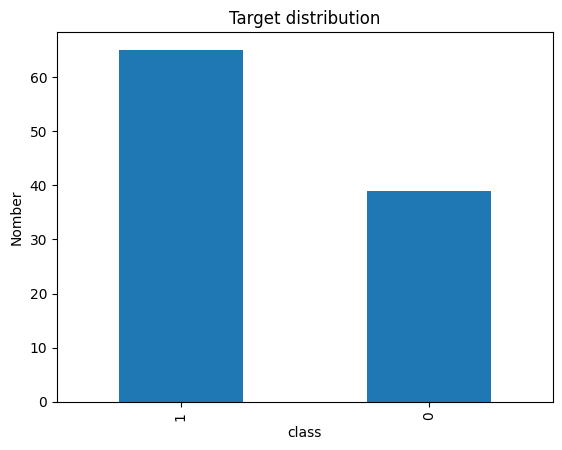

In [9]:
sp=df["class"].value_counts().plot(kind='bar',title = 'Target distribution')
sp.set_xlabel('class')
sp.set_ylabel('Nomber')

#plt.savefig("class.pdf")

##PRINCIPALE CONCLUSIONS DES PREMIERS APPERCUS SUR LE DATASET
**L'observation des statistiques montre :**

  - **Toutes les variables sont quantitatives**
  
  - **un déséquilibre entre les chiffres des variables du dataset**.

  - **un déséquilibrage sur la répartition de la variable cible. En effet 62% de participants sont malades alors que 32% environ sont sains**.
  -**après première analyse on note une absence de variable sensible (variable pouvant poser des problèmes raciste, sexiste, d'équité etc...)**

##DIVISION DU DATASET EN DONNEES D'ENTRAINEMENT ET DE VALIDATION

## Normalisation des données

Comme noté plus haut, on note un déséquilibre entre les valeurs des variables du dataset. Nous allons procéder à la normalisation des données pour éviter les biais sur les poids lors de l'entrainement du modèle.

## EXEMPLE MODELISATION 2 : Réseau de neurones à deux couches

## PREPARATION A NOUVEAU LES DONNEES POUR L'ENTRAINEMENT DU MODEL

## **REMARQUE** :
  **Conformément à la description du dataset, les 450 colonnes des données d'entrainement sont constituées des caractéristiques d'écriture manuscrite extraites de 25 tâches (18 caractéristiques par tâche).**

## **Hypothèse**
**Les chiffres statistiques (Le minimum, le maximum, la moyenne, la variance etc...) des 18 informations sur chaque caractéristiques représentent des données suffisantes pour entrainer le modèle**

**Dans cette partie nous allons déterminer le dataset des statistiques de chaque caractéristique pour chacune des ligne du dataset.**


In [11]:
# DATASET FORME DES STATISTIQUES
def stat_data(df,cat='train'):

  K_rasteritic=[[[0 for _ in range(0)] for _ in range(25)] for _ in range(18)]
  df_2=df
  df_min_max=df
  for c in range(0,18,1):
      column_indices= [c+18*num_tache for num_tache in range(0,25,1)] # liste des indices des colonnes ayant pour caracteristique c
      K_rasteritic[c] = df.iloc[:, column_indices] # selection des 25 tache de la caracteristique c

      #construction du dataset à partir des minimum et maximum pour chacune des 18 caracteristiques
      df_2['minim_caract'+str(c)]=np.min(K_rasteritic[c], axis =1) #pour completer les colonnes minimum au dataset initial df
      df_2['maxim_caract'+str(c)]=np.max(K_rasteritic[c], axis =1) # pour completer les colonnes maximums au dataset initial df
      df_2['moyenne_caract'+str(c)]=np.mean(K_rasteritic[c], axis =1) # pour completer les colonnes moyenne au dataset initial df
      df_2['variance_caract'+str(c)]=np.var(K_rasteritic[c], axis =1) # pour completer les colonnes variance au dataset initial df
      df_2['mediane_caract'+str(c)]=np.median(K_rasteritic[c], axis =1) # pour completer les colonnes variance au dataset initial df

      #formation du dataset des colonnes statistique
  for c in range(0,18,1):
    if cat=='test':
      df_min_max = df_2.iloc[:, range(450,540,1)]
    else:
      df_min_max = df_2.iloc[:, range(450,541,1)]
  return df_min_max

In [12]:
stat_data(df).shape

(104, 91)

**Le nouveau dataset est constitué de 91 colonnes représentatives.**

## Nous allons entrainer le modèle sur le nouveau dataset des chiffres statistiques des 18 caractéristiques.

In [13]:
data =stat_data(df)
X = data.drop('class', axis=1)  # Remplacez 'label' par le nom de votre colonne cible
y = data['class']

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# normalisation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [17]:
import tensorflow as tf

In [18]:
model = Sequential([
    Dense(90, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(36, activation='relu'),
    Dense(1, activation='sigmoid')  # Pour un problème binaire
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


e:\IAGENE\conda-repertorie\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
#entrainement
history = model.fit(X_train, y_train, epochs=20, batch_size=9, validation_split=0.1)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4626 - loss: 0.7466 - val_accuracy: 1.0000 - val_loss: 0.3664
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7858 - loss: 0.4613 - val_accuracy: 1.0000 - val_loss: 0.2453
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8712 - loss: 0.3447 - val_accuracy: 1.0000 - val_loss: 0.2043
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9409 - loss: 0.2810 - val_accuracy: 1.0000 - val_loss: 0.1802
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9366 - loss: 0.2345 - val_accuracy: 1.0000 - val_loss: 0.1660
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9340 - loss: 0.1963 - val_accuracy: 1.0000 - val_loss: 0.1495
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9848 - loss: 0.1286 - val_accuracy: 1.0000 - val_loss: 0.1423
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.1063 - val_accuracy: 0.8889 - val_loss: 0.1532


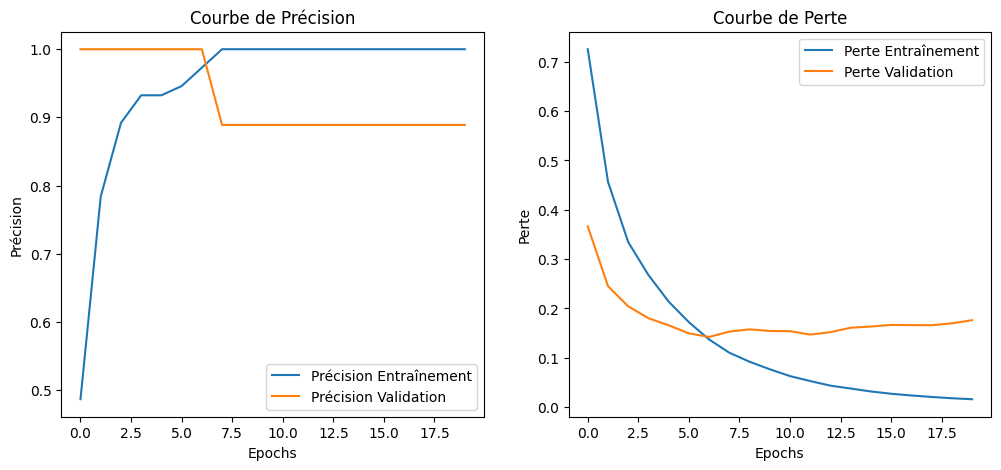

In [22]:
#courbe d'apprentisage

# Récupération de la précision et de l'AUC
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))

# Précision
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Précision Entraînement')
plt.plot(val_accuracy, label='Précision Validation')
plt.title('Courbe de Précision')
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.legend()

# Perte
plt.subplot(1, 2, 2)
plt.plot(loss, label='Perte Entraînement')
plt.plot(val_loss, label='Perte Validation')
plt.title('Courbe de Perte')
plt.xlabel('Epochs')
plt.ylabel('Perte')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Matrice de confusion :
[[ 5  2]
 [ 2 12]]
Accuracy : 0.8095
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
AUC ROC : 0.9388
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


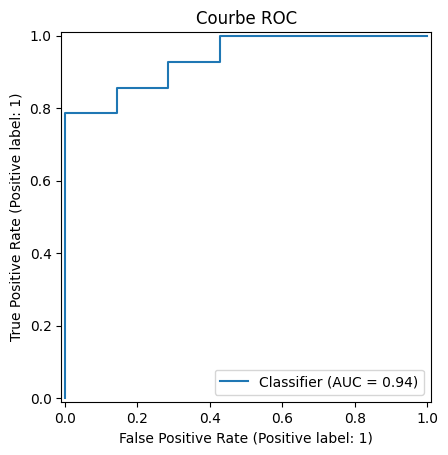

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay

# Prédictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(cm)

# Précision
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy:.4f}')

# AUC ROC
auc_roc = roc_auc_score(y_test, model.predict(X_test))
print(f'AUC ROC : {auc_roc:.4f}')

# Affichage de la courbe ROC
RocCurveDisplay.from_predictions(y_test, model.predict(X_test))
plt.title('Courbe ROC')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Matrice de confusion :
[[ 5  2]
 [ 2 12]]
Accuracy : 0.8095
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
AUC ROC : 0.9388
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


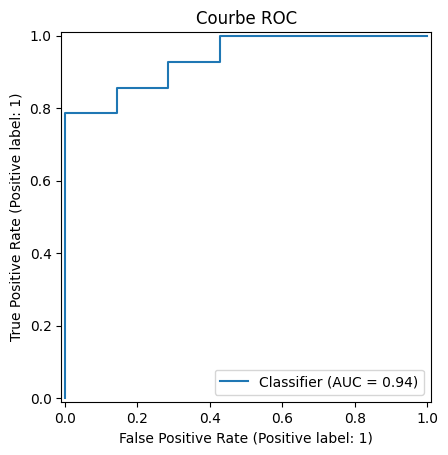

In [24]:
#Evaluation du model

# Prédictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(cm)

# Précision
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy:.4f}')

# AUC ROC
auc_roc = roc_auc_score(y_test, model.predict(X_test))
print(f'AUC ROC : {auc_roc:.4f}')

# Affichage de la courbe ROC
RocCurveDisplay.from_predictions(y_test, model.predict(X_test))
plt.title('Courbe ROC')
plt.show()


# Submission

## Downloading the test data

In [108]:
#filename = "test.csv"
#fileid = "1vZBMnmv2pvAHUi7IR1cSYjxLW0yt2eeU"
#!wget -O $filename 'https://docs.google.com/uc?export=download&id='$fileid -q

In [25]:
df_test = pd.read_csv("./test.csv", sep=";")



In [26]:
new_data =stat_data(df_test,cat='test')
X_new = scaler.transform(new_data)  # Normaliser

# Prédictions
y_new_pred_prob = model.predict(X_new)
y_new_pred = (y_new_pred_prob > 0.5).astype(int)

probabilitie=[]
# Affichage des probabilités de prédiction
for i in range(len(new_data)):
    probabilitie.append(y_new_pred_prob[i][0])
    #print(f'Donnée {i+1} : Prédiction : {y_new_pred[i][0]}, Probabilité : {y_new_pred_prob[i][0]:.4f}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [27]:
df_submission = pd.DataFrame({"ID": range(len(probabilitie)), "TARGET": probabilitie})
df_submission.to_csv("./submission.csv", index=False)

In [28]:
df_submission

,ID,TARGET
0,0,0.999980
1,1,0.998210
2,2,0.997405
3,3,0.996850
4,4,0.534758
...,...,...
65,65,0.997995
66,66,0.001649
67,67,0.002820
68,68,0.002337


## MERCI A VOUS !